In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [37]:
import matplotlib.pyplot as plt

    Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
    Какой клиент совершил больше всего успешных операций? (success == True)
    С какой платформы осуществляется наибольшее количество успешных операций?
    Какую платформу предпочитают премиумные клиенты?
    Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
    Постройте график распределения числа успешных операций
    Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?
          

Описание данных

user_data:

    client – идентификатор пользователя
    premium – является ли клиент премиум
    age – возраст

logs:

    client – идентификатор пользователя
    success – результат (успех - 1, нет - 0)
    platform – платформа
    time – время в формате Unix

In [4]:
user_data= pd.read_csv('/home/jupyter-o-zabodaeva-19/shared/homeworks/python_ds_miniprojects/3/user_data.csv', encoding='windows-1251')

In [5]:
logs=pd.read_csv('/home/jupyter-o-zabodaeva-19/shared/homeworks/python_ds_miniprojects/3/logs.csv', encoding='windows-1251')

In [7]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [8]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [9]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [10]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [11]:
user_data.shape

(2954, 3)

In [12]:
logs.shape

(4500, 4)

In [13]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [14]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [15]:
user_data.nunique()

client     2954
premium       2
age          50
dtype: int64

In [16]:
logs.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

In [40]:
logs.query('success==True').groupby('client').agg({'platform': 'count'}).sort_values('platform').query('platform==41')

,platform
client,
12179,41
78349,41
61468,41
82563,41
28719,41
52870,41
36165,41
92584,41
61473,41


In [41]:
logs.query('success==True').groupby('platform').agg({'time': 'count'}).sort_values('platform')

,time
platform,
computer,1090
phone,2019
tablet,180


In [44]:
premium_client=user_data.query('premium==True').merge(logs, on='client', how='inner')

In [45]:
premium_client.groupby('platform').agg({'time': 'count'}).sort_values('platform')

,time
platform,
computer,150
phone,246
tablet,24


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


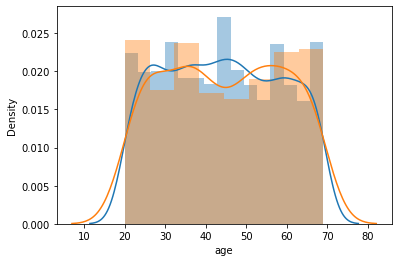

In [50]:
sns.distplot(user_data.age)
sns.distplot(premium_client.age)

In [104]:
succes_operation=logs.query('success==True').groupby('client', as_index=False).agg({'platform': 'count'}).groupby('platform', as_index=False)

In [105]:
succes_operation

In [106]:
sns.distplot(succes_operation.success)

AttributeError: 'DataFrameGroupBy' object has no attribute 'success'

In [1]:
numbers = [1, -2, 3, 0, -3, 2]

In [2]:
positive_numbers=[]

In [3]:
for i in numbers:
    if i%2>0:
        positive_numbers.append(i)
    if i==0:
        break
    

In [4]:
positive_numbers

[1, 3]

In [33]:
gr=logs.query('success==True'and 'platform=="computer"').merge(user_data, on='client', how='inner')

In [34]:
gr.head()

,client,success,platform,time,premium,age
0,10931,True,computer,1585468629,False,28
1,32167,True,computer,1585457972,False,42
2,71087,True,computer,1585458446,False,36
3,39975,True,computer,1585428343,False,69
4,99308,True,computer,1585409409,True,38


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


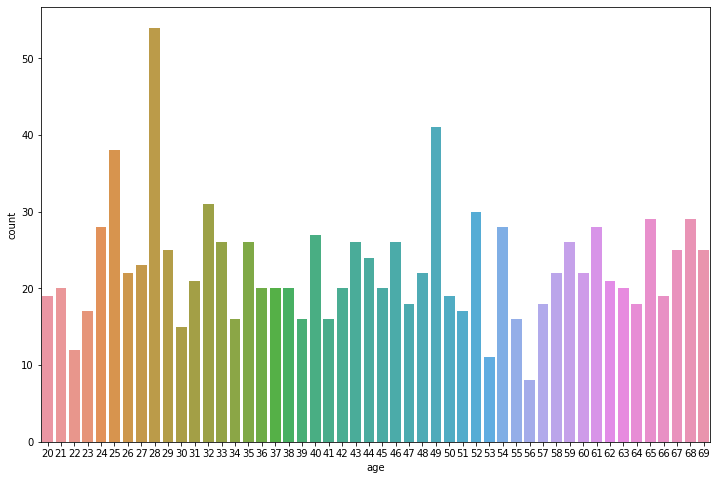

In [39]:
plt.figure(figsize=(12, 8))
sns.countplot(gr.age)